1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pylab

BS = '\033[1m'
BE = '\033[0m'

%matplotlib inline

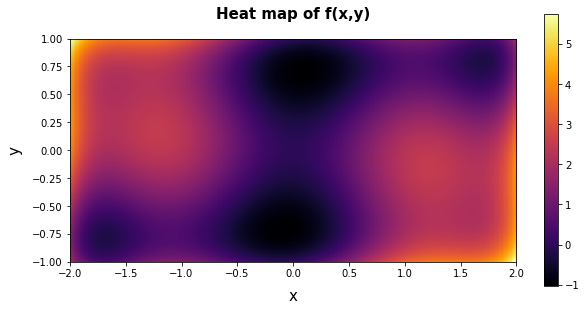

In [2]:
#Function definition

def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)


#Use imshow() to find visually the regions
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X,Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10,5))
plt.imshow(f([X,Y]), cmap = "inferno", extent = [-2, 2,-1, 1])
plt.colorbar()
plt.xlabel("x",size = 15, labelpad  = 10)
plt.ylabel("y",size = 15, labelpad  = 10)
plt.title("Heat map of f(x,y)", size = 15, fontweight ="bold", pad=20)
plt.show()


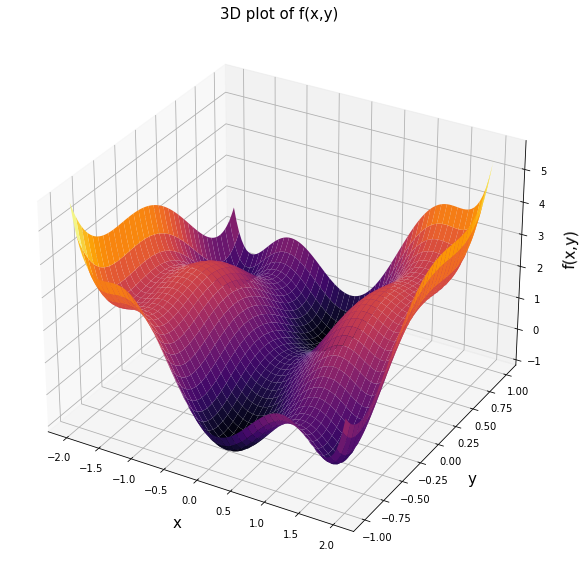

In [3]:
#To better understand use also a 3D plot
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f([X,Y]),cmap = "inferno", rstride = 3, cstride = 2 )
ax.set_title('3D plot of f(x,y)',size = 15,  pad=0)
ax.set_xlabel('x', size = 15, labelpad  = 10)
ax.set_ylabel('y', size = 15, labelpad  = 10)
ax.set_zlabel('f(x,y)', size = 15, labelpad  = 10)
plt.show()


#From these two plots we can see that there are two global minima, around x=0

In [4]:
#Find the two global minima and the function value at those points
#We use the different methods provided by optimize.minimize() and, looking at the figure, we set a proper initial guess

methods = ['Nelder-Mead', 'Powell','CG', 'BFGS' ,'L-BFGS-B', 'TNC', 'COBYLA' , 'SLSQP']
for i in methods:
    print("\nMethod:",i)
    solution1 = optimize.minimize(f, x0 = (-1,-1), method= i)
    print("x0 =", solution1['x'],", f(x0) =",solution1['fun'], "; success:",solution1['success'] )
    solution2 = optimize.minimize(f, x0 = (1,1), method= i)
    print("x0 =", solution2['x'],", f(x0) =",solution2['fun'], "; success:",solution2['success'] )
    
print(BS,"\nGiven a small precision error, we conclude that the global minima are:", solution1['x'],"," , solution2['x'])
print("and the function value in these points is:", solution1['fun'])


Method: Nelder-Mead
x0 = [ 0.08986599 -0.71268205] , f(x0) = -1.0316284464752081 ; success: True
x0 = [-0.08986599  0.71268205] , f(x0) = -1.0316284464752081 ; success: True

Method: Powell
x0 = [ 0.09003343 -0.7129541 ] , f(x0) = -1.0316276416006196 ; success: True
x0 = [ 0.08984201 -0.71265645] , f(x0) = -1.0316284534898565 ; success: True

Method: CG
x0 = [-0.08984194  0.71265632] , f(x0) = -1.031628453489812 ; success: True
x0 = [ 0.08984193 -0.71265633] , f(x0) = -1.0316284534898164 ; success: True

Method: BFGS
x0 = [-0.08984198  0.71265633] , f(x0) = -1.0316284534898341 ; success: True
x0 = [ 0.08984197 -0.71265635] , f(x0) = -1.031628453489845 ; success: True

Method: L-BFGS-B
x0 = [-0.08984152  0.71265878] , f(x0) = -1.0316284534415419 ; success: True
x0 = [ 0.08984151 -0.71265879] , f(x0) = -1.0316284534410625 ; success: True

Method: TNC
x0 = [-0.08984232  0.71265534] , f(x0) = -1.0316284534799787 ; success: True
x0 = [ 0.08985304 -0.71264739] , f(x0) = -1.0316284522509003 

In [5]:
#What happens for an initial guess of  (𝑥,𝑦)=(0,0) ?

for i in methods:
    print("\nMethod:",i)
    solution = optimize.minimize(f, x0 = (0,0), method= i)
    print("x0 =", solution['x'],", f(x0) =",solution['fun'], "; success:",solution['success'] )

print(BS,"\nUsing an initial guess like (0,0) only some of the methods find a corret global minima.\n")


Method: Nelder-Mead
x0 = [-0.08985145  0.71266538] , f(x0) = -1.031628452567338 ; success: True

Method: Powell
x0 = [-0.08984201  0.71265634] , f(x0) = -1.0316284534898421 ; success: True

Method: CG
x0 = [0. 0.] , f(x0) = 0.0 ; success: True

Method: BFGS
x0 = [0. 0.] , f(x0) = 0.0 ; success: True

Method: L-BFGS-B
x0 = [0. 0.] , f(x0) = 0.0 ; success: True

Method: TNC
x0 = [0. 0.] , f(x0) = 0.0 ; success: True

Method: COBYLA
x0 = [-0.08982442  0.71254663] , f(x0) = -1.0316283555553818 ; success: True

Method: SLSQP
x0 = [0. 0.] , f(x0) = 0.0 ; success: True
 
Using an initial guess like (0,0) only some of the methods find a corret global minima.



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.
 
$X = (\theta,\omega)$

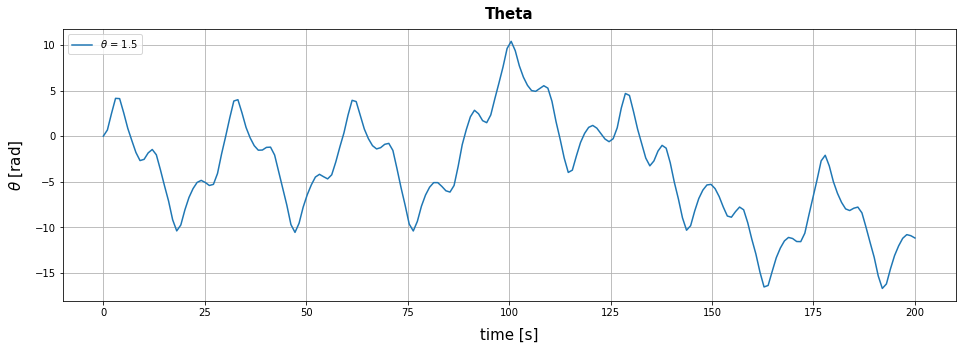

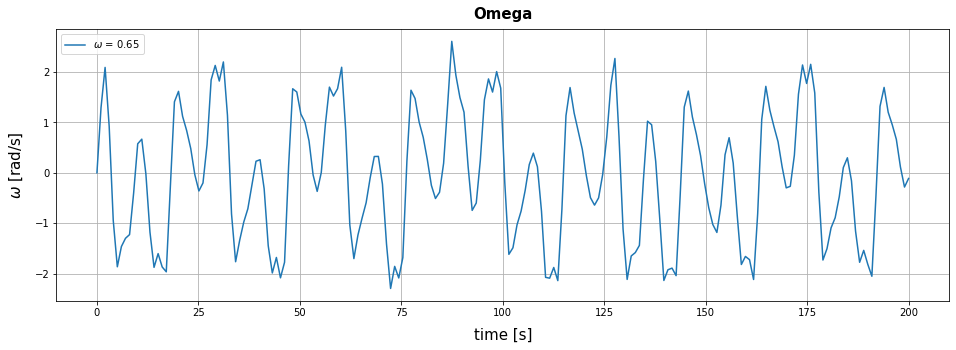

In [6]:
from scipy.integrate import odeint

def derivative(X, time, Q, d, O):
    return(X[1], -1/Q * X[1] + np.sin(X[0]) + d*np.cos(O*time))

theta_zero = 0
omega_zero = 0
Q = 2      #damping factor
d = 1.5    #forcing amplitude
O = 0.65      #driving frequency 
time = np.linspace(0, 200, 200)

Xinit = (theta_zero, omega_zero) #initial condition
X = odeint(derivative, Xinit, time, args=(Q,d,O))

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

ax1.plot(time, X[:, 0], label="$θ$ = %.1f" %d)
ax2.plot(time, X[:, 1], label="$\omega$ = %.2f" %O)
    
#plot theta
ax1.legend(loc='upper left')
ax1.set_title('Theta', size = 15, pad = 10,fontweight ="bold")
ax1.set_xlabel('time [s]', size = 15, labelpad  = 10)
ax1.set_ylabel('$θ$ [rad]', size = 15, labelpad  = 10)
ax1.grid()


#plot omega
ax2.legend(loc='upper left')
ax2.set_title('Omega', size = 15, pad = 10,fontweight ="bold")
ax2.set_xlabel('time [s]', size = 15, labelpad  = 10)
ax2.set_ylabel('$\omega$ [rad/s]', size = 15, labelpad  = 10)
ax2.grid()
plt.show()

#As we can see from the plot, there is a set of parameters for which the motion is chaotic

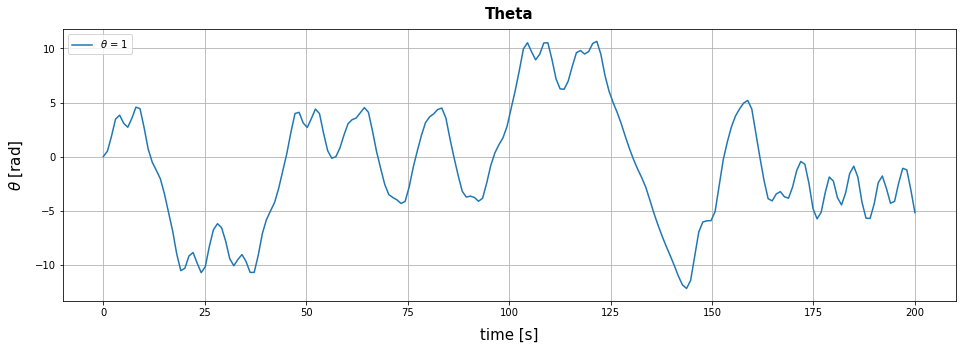

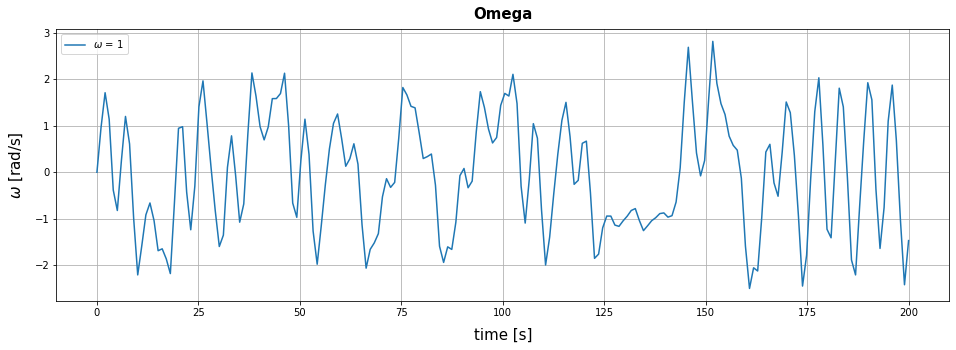

In [7]:
from scipy.integrate import odeint

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

d_k = 1
omega_k = 1

X = odeint(derivative, [0,0], time, args=(10,d_k ,omega_k))
ax1.plot(time, X[:, 0], label="$θ$ = %d" %d_k)
ax2.plot(time, X[:, 1], label="$\omega$ = %d" %omega_k)
    
#plot theta
ax1.legend(loc='upper left')
ax1.set_title('Theta', size = 15, pad = 10,fontweight ="bold")
ax1.set_xlabel('time [s]', size = 15, labelpad  = 10)
ax1.set_ylabel('$θ$ [rad]', size = 15, labelpad  = 10)
ax1.grid()

#plot omega
ax2.legend(loc='upper left')
ax2.set_title('Omega', size = 15, pad = 10,fontweight ="bold")
ax2.set_xlabel('time [s]', size = 15, labelpad  = 10)
ax2.set_ylabel('$\omega$ [rad/s]', size = 15, labelpad  = 10)
ax2.grid()

plt.show()

#As we can see from the plot, there is a set of parameters for which the motion is chaotic

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [8]:
from scipy import fftpack
from matplotlib.ticker import  MultipleLocator, FormatStrFormatter, AutoMinorLocator

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]


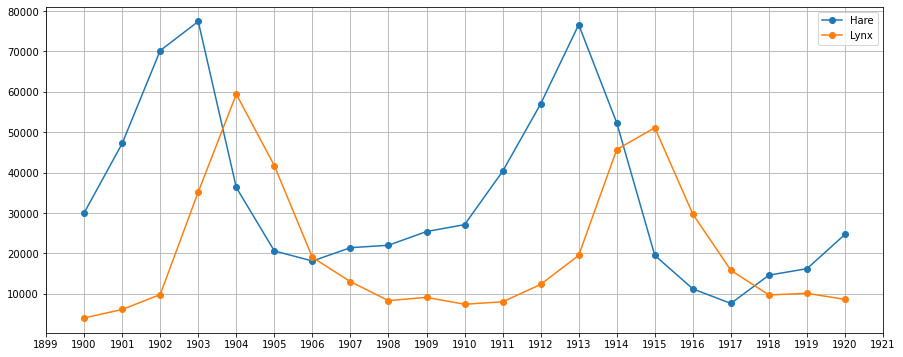

In [9]:
data = np.loadtxt('data/populations.txt')
year, hares_sig, lynxes_sig, carrots = data.T 
print(year)

fig = plt.figure(figsize=(15, 6))
plt.plot(year, hares_sig, 'o-', year, lynxes_sig, 'o-') 
plt.legend(('Hare', 'Lynx'), loc="upper right")
ax = fig.axes[0]
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.grid()
plt.show()

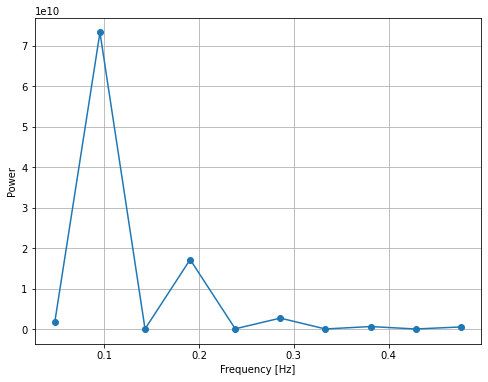

Peak frequency: 0.09523809523809523
The period of the hares population is: 10.5 years


In [10]:

#analyze hares
sig_fft = fftpack.fft(hares_sig)
power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(hares_sig.size, d=1)

#focus only on only the positive frequencies
i = sample_freq > 0
freqs = sample_freq[i]
powes = power[i]

#plot the FFT power
fig = plt.figure(figsize=(8, 6))
plt.plot(freqs,powes, 'o-')

ax = fig.axes[0]
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.grid()
plt.show()

# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)
print(f"\033[1mThe period of the hares population is: {1/peak_freq} years")

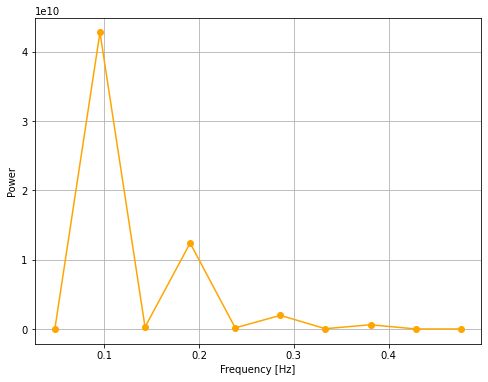

Peak frequency: 0.09523809523809523
The period of the lynxes population is 10.5 years


In [11]:
#analyze lynxes
sig_fft = fftpack.fft(lynxes_sig)
power = np.abs(sig_fft) ** 2
sample_freq = fftpack.fftfreq(lynxes_sig.size, d=1)

#focus only on only the positive frequencies
i = sample_freq > 0
freqs = sample_freq[i]
powes = power[i]

#plot the FFT power
fig = plt.figure(figsize=(8, 6))
plt.plot(freqs,powes,'o-',c = "orange")

ax = fig.axes[0]
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.grid()
plt.show()

# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)
print(f"\033[1mThe period of the lynxes population is {1/peak_freq} years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

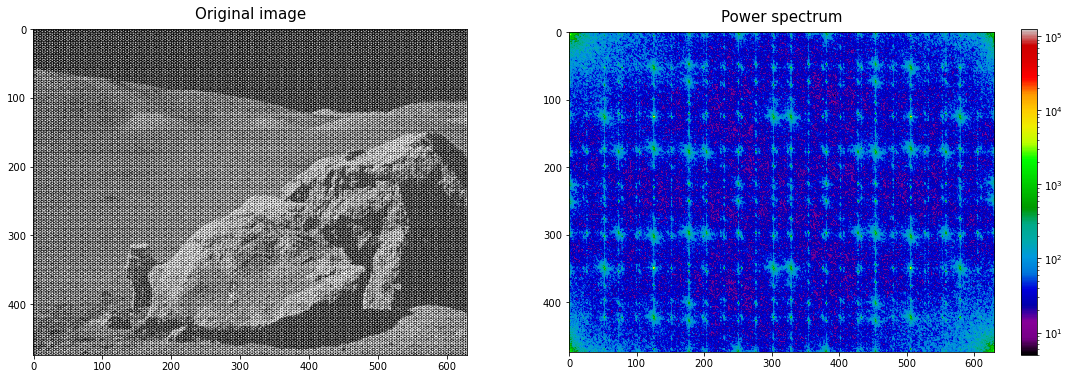

In [12]:
from matplotlib.colors import LogNorm
import pandas as pd

#load and plot photo
photo = plt.imread("images/moonlanding.png", format="png")

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.imshow(photo, cmap = "gray")
plt.title("Original image", size = 15, pad  = 10)

#Apply fft
photo_fft = fftpack.fft2(photo)
power = np.abs(photo_fft)

#Plot power spectrum
plt.subplot(122)
plt.imshow(power, norm=LogNorm(vmin=5),cmap='nipy_spectral')
plt.colorbar()
plt.title("Power spectrum", size = 15, pad  = 10)
plt.subplots_adjust(wspace = 0.1 )
plt.show()


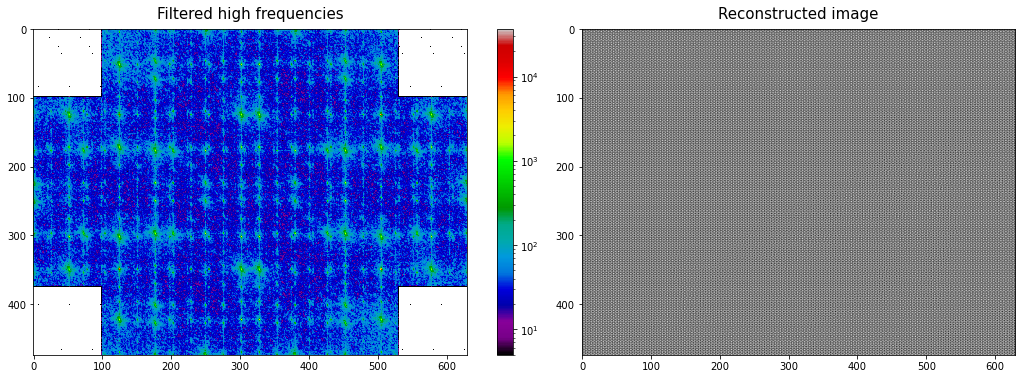

From the reconstructed image we can see that, filtering the high frequencies, we have only the noise.
Therefore to remove the noise we have to filter the low frequencies.


In [13]:
#Fistrly we try to filter the high frequencies

photo_fft = fftpack.fft2(photo)

#set to zero the high frequencies
tresh = 100
photo_fft[:tresh, :tresh] = 0 #upper left
photo_fft[:tresh, -tresh:] = 0 #upper right
photo_fft[-tresh:, :tresh] = 0 #bottom left
photo_fft[-tresh:, -tresh:] = 0 #upper right
power = np.abs(photo_fft)

#Plot the power spectrum
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.imshow(power,cmap='nipy_spectral',norm=LogNorm(vmin=5))
plt.title("Filtered high frequencies", size = 15, pad  = 10)
plt.colorbar()

#Reconstructed image
filtered = fftpack.ifft2(photo_fft).real
plt.subplot(122)
plt.imshow(filtered,cmap = "gray")
plt.title("Reconstructed image", size = 15, pad  = 10)

plt.subplots_adjust(wspace = -0.15 )
plt.show()


print("From the reconstructed image we can see that, filtering the high frequencies, we have only the noise.")
print("\033[1mTherefore to remove the noise we have to filter the low frequencies.")

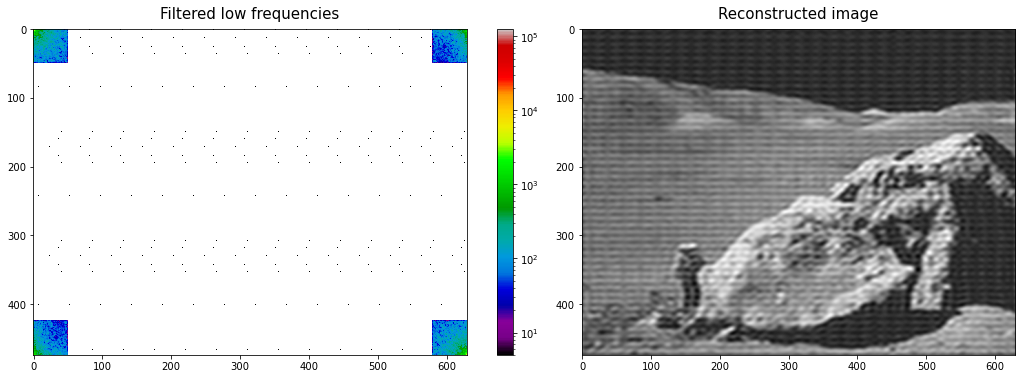

In [14]:
#Let's filter the low frequncies

photo_fft = fftpack.fft2(photo)

#Set noise components to zero
tresh = 50
photo_fft[tresh:-tresh, :] = 0 
photo_fft[:,tresh:-tresh] = 0 
power = np.abs(photo_fft)

#Plot the power spectrum
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.imshow(power,cmap='nipy_spectral',norm=LogNorm(vmin=5))
plt.title("Filtered low frequencies", size = 15, pad  = 10)
plt.colorbar()

#Reconstructed image
filtered = fftpack.ifft2(photo_fft).real
plt.subplot(122)
plt.imshow(filtered,cmap = "gray")
plt.title("Reconstructed image", size = 15, pad  = 10)

plt.subplots_adjust(wspace = -0.15 )
plt.show()